In [27]:
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt    
import joblib  #We train once, save the model, and reuse it in production, deployment, or during predictions without retraining.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression        
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix
)

In [29]:
df = pd.read_csv("pronostico_dataset (1).csv", delimiter=';')
df.drop(columns=["ID"], inplace=True)          

In [30]:
df

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,78.346286,109.154591,90.713220,92.511770,retinopathy
...,...,...,...,...,...
5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,63.468956,106.809289,88.060631,106.052213,retinopathy


In [31]:
# Encoding target
le = LabelEncoder()
df["prognosis"] = le.fit_transform(df["prognosis"])

In [32]:
# Spliting features and labels
X = df.drop(columns=["prognosis"])
y = df["prognosis"] 

In [33]:
X

,age,systolic_bp,diastolic_bp,cholesterol
0,77.196340,85.288742,80.021878,79.957109
1,63.529850,99.379736,84.852361,110.382411
2,69.003986,111.349455,109.850616,100.828246
3,82.638210,95.056128,79.666851,87.066303
4,78.346286,109.154591,90.713220,92.511770
...,...,...,...,...
5995,49.611850,94.857639,86.615671,107.643986
5996,63.099686,100.039527,93.515186,104.971404
5997,55.562243,98.421446,102.697875,120.875951
5998,63.468956,106.809289,88.060631,106.052213


In [34]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5995    0
5996    1
5997    1
5998    1
5999    0
Name: prognosis, Length: 6000, dtype: int32

In [35]:
# Spliting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [36]:
#logistic regression -- used for classification
# Training Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [37]:
# Accuracy and classification report for logistic regression
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

=== Logistic Regression ===
Accuracy: 0.7466666666666667
                precision    recall  f1-score   support

no_retinopathy       0.73      0.74      0.74       575
   retinopathy       0.76      0.75      0.75       625

      accuracy                           0.75      1200
     macro avg       0.75      0.75      0.75      1200
  weighted avg       0.75      0.75      0.75      1200



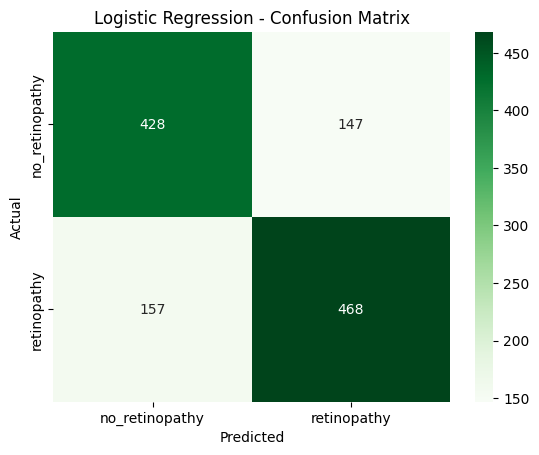

In [38]:
# Confusion matrix for logistic regression
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [39]:
# Saving the model(logistic regression)
joblib.dump(logreg, "logistic_regression_model.pkl")
print("Logistic Regression model saved as 'logistic_regression_model.pkl'")

Logistic Regression model saved as 'logistic_regression_model.pkl'


In [40]:
# Training Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [41]:
# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred, target_names=le.classes_))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',  
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


=== Random Forest ===
Accuracy: 0.7366666666666667
                precision    recall  f1-score   support

no_retinopathy       0.73      0.71      0.72       575
   retinopathy       0.74      0.76      0.75       625

      accuracy                           0.74      1200
     macro avg       0.74      0.74      0.74      1200
  weighted avg       0.74      0.74      0.74      1200



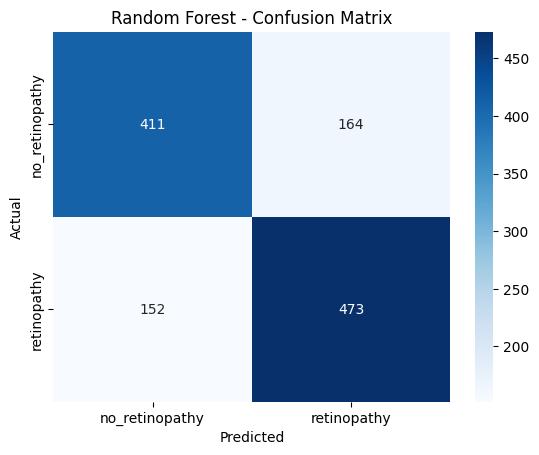

In [42]:
# Evaluating Models
evaluate_model("Random Forest", y_test, y_pred_rf)

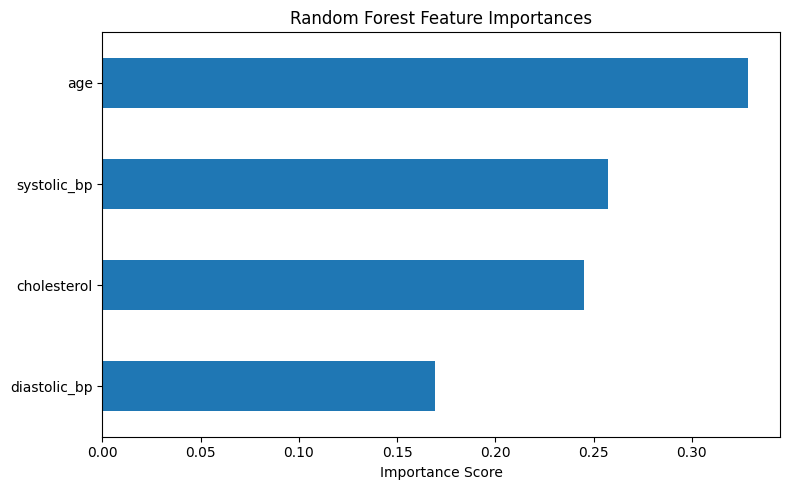

In [43]:
# Feature Importance for Random Forest
plt.figure(figsize=(8, 5))
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [44]:
# Save the models
joblib.dump(rf, "random_forest_model.pkl")     

['random_forest_model.pkl']

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.svm import SVC
from xgboost import XGBClassifier

In [46]:
# Support Vector Machine (SVM)
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [47]:
# XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


C:\Users\yasha\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:47:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [48]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred, target_names=le.classes_))
    
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


=== Support Vector Machine ===
Accuracy: 0.7533333333333333
                precision    recall  f1-score   support

no_retinopathy       0.76      0.72      0.74       575
   retinopathy       0.75      0.79      0.77       625

      accuracy                           0.75      1200
     macro avg       0.75      0.75      0.75      1200
  weighted avg       0.75      0.75      0.75      1200



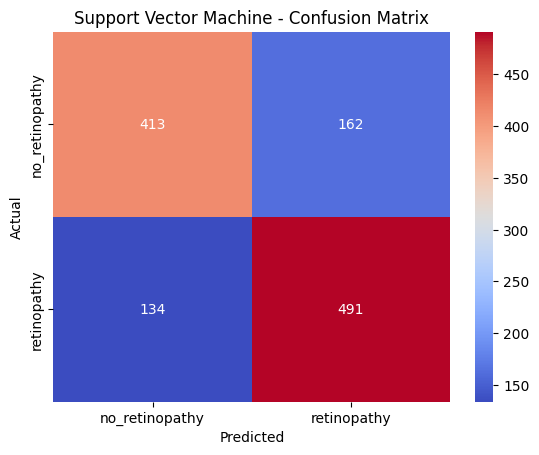


=== XGBoost Classifier ===
Accuracy: 0.7158333333333333
                precision    recall  f1-score   support

no_retinopathy       0.71      0.68      0.70       575
   retinopathy       0.72      0.75      0.73       625

      accuracy                           0.72      1200
     macro avg       0.72      0.71      0.71      1200
  weighted avg       0.72      0.72      0.72      1200



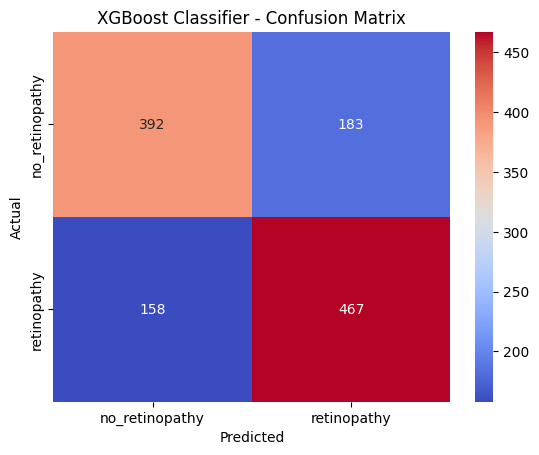

In [49]:
evaluate_model("Support Vector Machine", y_test, y_pred_svm)
evaluate_model("XGBoost Classifier", y_test, y_pred_xgb)

In [50]:
joblib.dump(svm, "svm_model.pkl")
joblib.dump(xgb, "xgboost_model.pkl")

print("SVM and XGBoost models saved as 'svm_model.pkl' and 'xgboost_model.pkl'")

SVM and XGBoost models saved as 'svm_model.pkl' and 'xgboost_model.pkl'


In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


=== K-Nearest Neighbors (KNN) ===
Accuracy: 0.7283333333333334
                precision    recall  f1-score   support

no_retinopathy       0.73      0.69      0.71       575
   retinopathy       0.73      0.76      0.74       625

      accuracy                           0.73      1200
     macro avg       0.73      0.73      0.73      1200
  weighted avg       0.73      0.73      0.73      1200



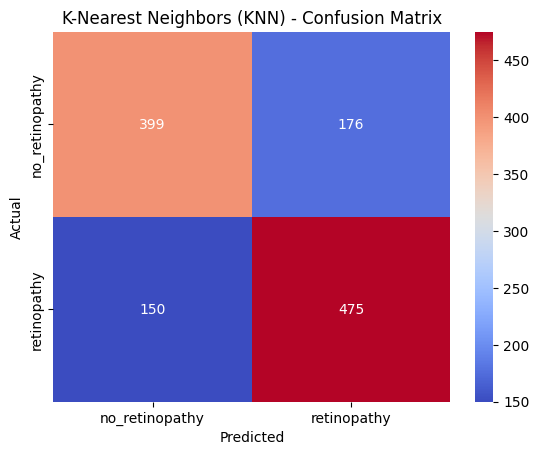

In [53]:
evaluate_model("K-Nearest Neighbors (KNN)", y_test, y_pred_knn)

In [54]:
joblib.dump(knn, "knn_model.pkl")

['knn_model.pkl']

In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)


=== Naive Bayes ===
Accuracy: 0.7358333333333333
                precision    recall  f1-score   support

no_retinopathy       0.71      0.77      0.74       575
   retinopathy       0.77      0.70      0.74       625

      accuracy                           0.74      1200
     macro avg       0.74      0.74      0.74      1200
  weighted avg       0.74      0.74      0.74      1200



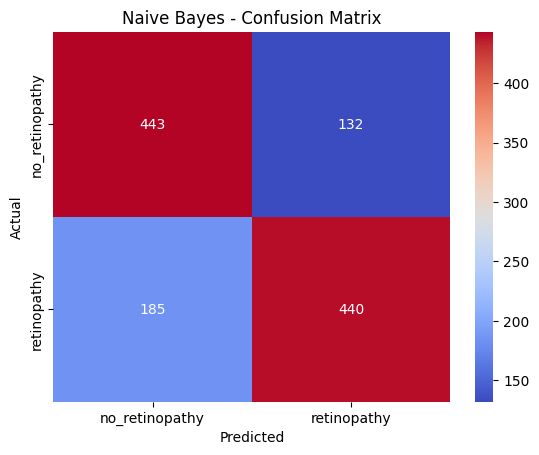

In [57]:
evaluate_model("Naive Bayes", y_test, y_pred_nb)

In [58]:
joblib.dump(nb, "naive_bayes_model.pkl")

['naive_bayes_model.pkl']